In [ ]:
#importar libreria

import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargar el conjunto de datos
#carga los datos de  viviendas de California
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)


(11610, 8)
(5160, 8)
(3870, 8)
(11610,)
(5160,)
(3870,)


In [ ]:
# Crear el modelo dered neuronal
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)])

In [ ]:
# Compilar el modelo
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=[keras.metrics.RootMeanSquaredError(),
                       keras.metrics.MeanAbsolutePercentageError()])

In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 2.5494 - root_mean_squared_error: 1.5967 - mean_absolute_percentage_error: 56.6004 - val_loss: 1.0455 - val_root_mean_squared_error: 1.0225 - val_mean_absolute_percentage_error: 45.2562
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8914 - root_mean_squared_error: 0.9441 - mean_absolute_percentage_error: 42.4301 - val_loss: 0.7639 - val_root_mean_squared_error: 0.8740 - val_mean_absolute_percentage_error: 40.7622
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7167 - root_mean_squared_error: 0.8466 - mean_absolute_percentage_error: 39.1364 - val_loss: 0.6954 - val_root_mean_squared_error: 0.8339 - val_mean_absolute_percentage_error: 38.0956
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6695 - root_mean_squared_error: 0.8182 - mean_absolute_percentage_error: 37.1230 - val_loss: 0.6557 - val_root_mean_squared_error: 0.8098 - val_

<Axes: >

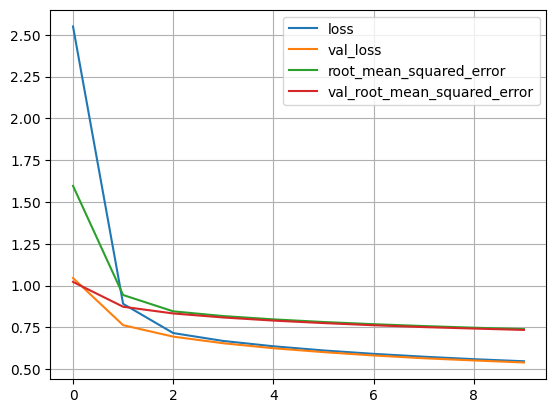

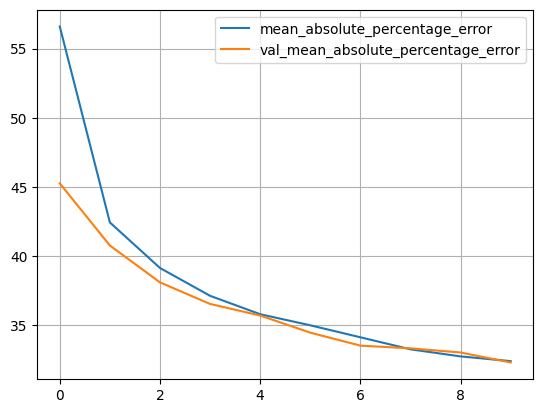

In [ ]:
# Graficar el historial de entrenamiento
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(grid=True)

In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train", loss)
print("root_mean_squared_error train", RMSE)
print("mean_absolute_percentage_error train", MAPE)

363/363 [==============================] - 1s 2ms/step - loss: 0.5417 - root_mean_squared_error: 0.7360 - mean_absolute_percentage_error: 32.0885
Evaluar el modelo en el conjunto de entrenamiento
loss train 0.5416944026947021
root_mean_squared_error train 0.7359989285469055
mean_absolute_percentage_error train 32.088478088378906


In [ ]:
# Evaluar el modelo en el conjunto de validación
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validación")
print("loss valid", loss)
print("root_mean_squared_error valid", RMSE)
print("mean_absolute_percentage_error valid", MAPE)

121/121 [==============================] - 0s 2ms/step - loss: 0.5408 - root_mean_squared_error: 0.7354 - mean_absolute_percentage_error: 32.3021
Evaluar el modelo en el conjunto de validación
loss valid 0.5408490300178528
root_mean_squared_error valid 0.7354243993759155
mean_absolute_percentage_error valid 32.302120208740234


In [ ]:
# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("loss test", loss)
print("root_mean_squared_error test", RMSE)
print("mean_absolute_percentage_error test", MAPE)

162/162 [==============================] - 0s 1ms/step - loss: 0.5732 - root_mean_squared_error: 0.7571 - mean_absolute_percentage_error: 32.2913
Evaluar el modelo en el conjunto de prueba
loss test 0.5731838345527649
root_mean_squared_error test 0.7570890784263611
mean_absolute_percentage_error test 32.29128646850586


cambios
1 capa oculta con 60 neuronas

(11610, 8)
(5160, 8)
(3870, 8)
(11610,)
(5160,)
(3870,)
Epoch 1/10
363/363 [==============================] - 3s 3ms/step - loss: 5.2408 - root_mean_squared_error: 2.2893 - mean_absolute_percentage_error: 39.5247 - val_loss: 0.4263 - val_root_mean_squared_error: 0.6529 - val_mean_absolute_percentage_error: 26.6198
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4319 - root_mean_squared_error: 0.6572 - mean_absolute_percentage_error: 26.9246 - val_loss: 0.3789 - val_root_mean_squared_error: 0.6155 - val_mean_absolute_percentage_error: 24.4850
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3886 - root_mean_squared_error: 0.6234 - mean_absolute_percentage_error: 25.5798 - val_loss: 0.3681 - val_root_mean_squared_error: 0.6068 - val_mean_absolute_percentage_error: 24.2161
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3777 - root_mean_squared_error: 0.6146 - mean_absolute_percentage_error: 25.1210 - val_l

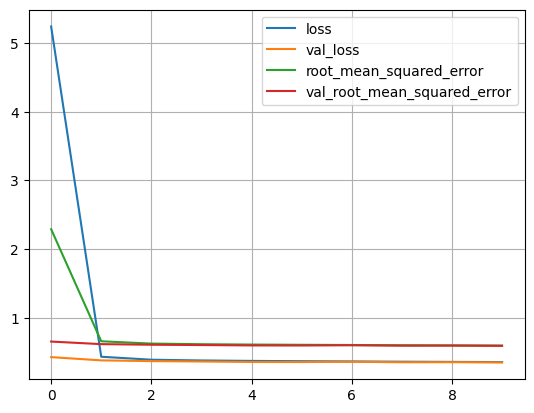

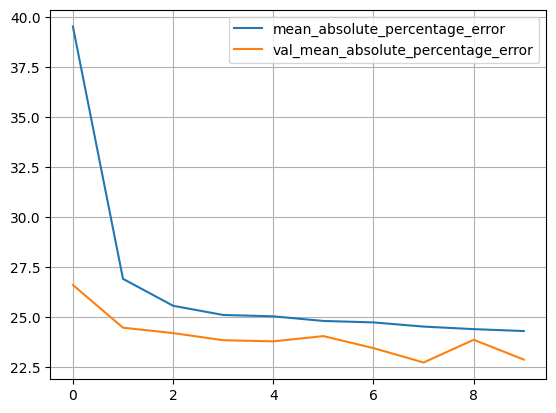

In [ ]:
#importar libreria

import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
#carga los datos de  viviendas de California
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

# Crear el modelo dered neuronal
model = keras.models.Sequential([
    keras.layers.Dense(60, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)])

# Compilar el modelo
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-2),
              metrics=[keras.metrics.RootMeanSquaredError(),
                       keras.metrics.MeanAbsolutePercentageError()])
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

# Graficar el historial de entrenamiento
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(grid=True)


# Evaluar el modelo en el conjunto de entrenamiento
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train", loss)
print("root_mean_squared_error train", RMSE)
print("mean_absolute_percentage_error train", MAPE)


# Evaluar el modelo en el conjunto de validación
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validación")
print("loss valid", loss)
print("root_mean_squared_error valid", RMSE)
print("mean_absolute_percentage_error valid", MAPE)



# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("loss test", loss)
print("root_mean_squared_error test", RMSE)
print("mean_absolute_percentage_error test", MAPE)

diferentes optimizadores

(11610, 8)
(5160, 8)
(3870, 8)
(11610,)
(5160,)
(3870,)
Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5482 - root_mean_squared_error: 0.7404 - mean_absolute_percentage_error: 29.4661 - val_loss: 1.0550 - val_root_mean_squared_error: 1.0272 - val_mean_absolute_percentage_error: 28.9536
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4561 - root_mean_squared_error: 0.6753 - mean_absolute_percentage_error: 26.1603 - val_loss: 2.8221 - val_root_mean_squared_error: 1.6799 - val_mean_absolute_percentage_error: 26.2272
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5376 - root_mean_squared_error: 0.7332 - mean_absolute_percentage_error: 25.0817 - val_loss: 0.3764 - val_root_mean_squared_error: 0.6135 - val_mean_absolute_percentage_error: 25.7412
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3581 - root_mean_squared_error: 0.5984 - mean_absolute_percentage_error: 24.0583 - val_l

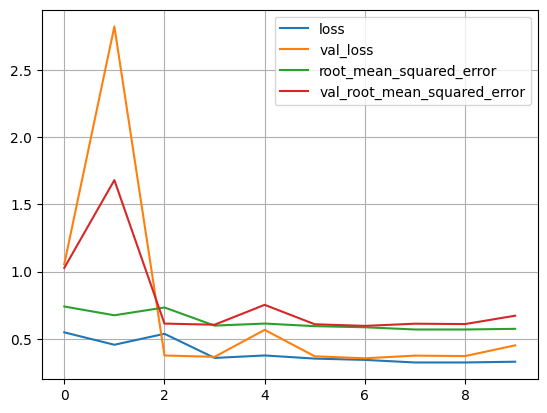

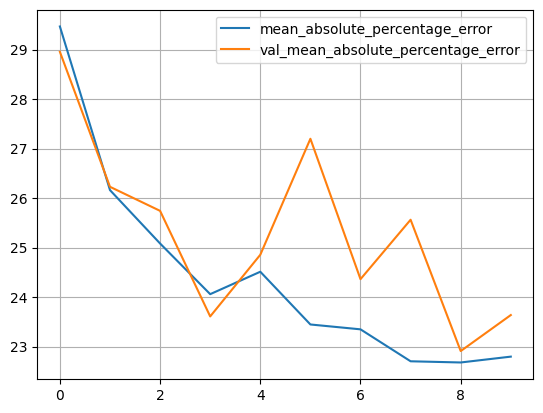

In [ ]:
#importar libreria

import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
#carga los datos de  viviendas de California
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

# Crear el modelo dered neuronal
model = keras.models.Sequential([
    keras.layers.Dense(60, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)])

# Compilar el modelo
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.Adam(learning_rate=1e-2),
              metrics=[keras.metrics.RootMeanSquaredError(),
                       keras.metrics.MeanAbsolutePercentageError()])
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

# Graficar el historial de entrenamiento
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(grid=True)


# Evaluar el modelo en el conjunto de entrenamiento
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train", loss)
print("root_mean_squared_error train", RMSE)
print("mean_absolute_percentage_error train", MAPE)


# Evaluar el modelo en el conjunto de validación
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validación")
print("loss valid", loss)
print("root_mean_squared_error valid", RMSE)
print("mean_absolute_percentage_error valid", MAPE)



# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("loss test", loss)
print("root_mean_squared_error test", RMSE)
print("mean_absolute_percentage_error test", MAPE)